# Problemas de Difusión

En este modulo del curso, hemos tratado metodos explicitos e implicitos para ecuaciones parabolicas en una y dos dimensiones. Hasta aqui, todos los esquemas han sido primer orden en tiempo y segundo orden en espacio.

En este cuaderno presentamos el esquema de Crank-Nicolson, el cual es un metodo de **segundo orden** tanto en tiempo como en espacio!

## Esquema de Crank-Nicolson

El [esquema de Crank-Nicolson](http://en.wikipedia.org/wiki/Crank–Nicolson_method) es un popular metodo implicito de segundo orden empleado con PDEs de tipo parabolico en particular. La idea principal es considerar el promedio entre las soluciones en $t^n$ y $t^{n+1}$ durante la evaluacion de la derivada espacial. Porque hacer esto? Puesto que la derivada temporal sera discretizada con un esquema centrado, se obtendra una precision de segundo orden!

Recordemos la ecuacion de calor 1D del [cuaderno 1](./04_01_EcuacionCalor_1D_Explicita.ipynb):

$$
\begin{equation}
    \frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}
\end{equation}
$$

En este caso, el esquema de Crank-Nicolson conduce a la siguiente ecuacion discretizada:

$$
\begin{equation}
    \begin{split}
        & \frac{T^{n+1}_i - T^n_i}{\Delta t} = \\
        & \quad \alpha \cdot \frac{1}{2} \left( \frac{T^{n+1}_{i+1} - 2 T^{n+1}_i + T^{n+1}_{i-1}}{\Delta x^2} + \frac{T^n_{i+1} - 2 T^n_i + T^n_{i-1}}{\Delta x^2} \right) \\
    \end{split}
\end{equation}
$$

Notemos que ambos indices temporales $n$ y $n+1$ aparecen del lado derecho. Veamos en el diagrama del *stencil* que estamos empleando mas informacion que antes para actualizar!

![stencil-cranknicolson](./figuras/stencil-cranknicolson.png)
#### Stencil del esquema de Crank-Nicolson.

Re-arreglando terminos de modo que todo aquello que *desconocemos* este del lado izquierdo y todo aquello que *conocemos* este del lado derecho, resulta:

$$
\begin{equation}
    \begin{split}
        & -T^{n+1}_{i-1} + 2 \left( \frac{\Delta x^2}{\alpha \Delta t} + 1 \right) T^{n+1}_i - T^{n+1}_{i+1} \\
        & \qquad = T^{n}_{i-1} + 2 \left( \frac{\Delta x^2}{\alpha \Delta t} - 1 \right) T^{n}_i + T^{n}_{i+1} \\
    \end{split}
\end{equation}
$$

De nuevo, se obtiene un sistema lineal de ecuaciones. Notamos que el lado izquierdo de la ecuacion se parece mucho a la matriz de coeficientes del [cuaderno 2](./04_02_EcuacionCalor_1D_Implicita.ipynb)!

Con respecto a las condiciones frontera, digamos que $T_0^{n+1}$ es un borde tipo Dirichlet. Entonces la ecuacion para $i=1$ es:

$$
\begin{equation}
    \begin{split}
         & 2 \left( \frac{\Delta x^2}{\alpha \Delta t} + 1 \right) T^{n+1}_1 - T^{n+1}_{2} \\ 
         & \qquad = T^{n}_{0} + 2 \left( \frac{\Delta x^2}{\alpha \Delta t} - 1 \right) T^{n}_1 + T^{n}_{2} + T^{n+1}_{0} \\
    \end{split}
\end{equation}
$$

Si consideramos un borde tipo Neumann $\left(\left.\frac{\partial T}{\partial x}\right|_{x=L} = q\right)$ en $T_{n_x-1}^{n+1}$, la ecuacion para $i=n_x-2$ es:

$$
\begin{equation}
    \begin{split}
        & -T^{n+1}_{n_x-3} + \left( 2 \frac{\Delta x^2}{\alpha \Delta t} + 1 \right) T^{n+1}_{n_x-2} \\
        & \qquad = T^{n}_{n_x-3} + 2 \left( \frac{\Delta x^2}{\alpha \Delta t} - 1 \right) T^{n}_{n_x-2} + T^{n}_{n_x-1} + q\Delta x \\
    \end{split}
\end{equation}
$$

El codigo lucira similar a aquel empleado para el metodo implicito en el [cuaderno 2](./04_02_EcuacionCalor_1D_Implicita.ipynb). Solo algunos terminos de la matriz y el vector de lado derecho seran diferentes!

### El Sistema Lineal

Asi como en el [cuaderno 2](./04_02_EcuacionCalor_1D_Implicita.ipynb), necesitamos resolver un sistema lineal en cada paso de tiempo de la forma:

$$
[A][T^{n+1}_\text{int}] = [b]+[b]_{b.c.}
$$

Si bien la matriz de coeficientes es similar a la que corresponde al caso previo, el vector de lado derecho se modifica en gran medida:

$$
\begin{align}
    \left[
        \begin{array}{cccccc}
             2 \left( \frac{1}{\sigma} + 1 \right) & -1 & 0 & \cdots & & 0 \\
             -1 & 2 \left( \frac{1}{\sigma} + 1\right) & -1 & 0 & \cdots & 0 \\
             0 & & \ddots & & & \vdots \\
             \vdots & & & & 2 \left( \frac{1}{\sigma} + 1\right) & \\
             0 & \cdots & & & -1 & \left( 2 \frac{1}{\sigma} + 1\right) \\
        \end{array}
    \right] \cdot 
    \left[
        \begin{array}{c} 
             T_1^{n+1} \\
             T_2^{n+1} \\
             \vdots \\
             \\
             T_{N-2}^{n+1} \\
        \end{array}
    \right] =
    \left[
        \begin{array}{c}
            T_0^n + 2 \left( \frac{1}{\sigma} - 1 \right) T_1^n + T_2^n \\
            T_1^n + 2 \left( \frac{1}{\sigma} - 1 \right) T_2^n + T_3^n \\
            \vdots \\
            \\
            T_{n_x-3}^n + 2 \left( \frac{1}{\sigma} - 1 \right) T_{n_x-2}^n + T_{n_x-1}^n \\
        \end{array}
    \right] +
    \begin{bmatrix}
        T_0^{n+1} \\
        0\\
        \vdots \\
        0 \\
        q \Delta x \\
    \end{bmatrix}
\end{align}
$$

Escribamos ahora una funcion que genere la matriz de coeficientes y el vector de lado derecho para el problema de conduccion de calor planteado en el [cuaderno 2](./04_02_EcuacionCalor_1D_Implicita.ipynb): esto es, usaremos BC tipo Dirichlet en $x=0$ y BC tipo Neumann con flujo nulo $(q=0)$ en $x=L$.

In [1]:
import numpy
from scipy import linalg

In [2]:
def lhs_operator(N, sigma):
    """
    Computes and returns the implicit operator
    of the system for the 1D diffusion equation.
    We use Crank-Nicolson method, Dirichlet condition
    on the left side of the domain and zero-gradient
    Neumann condition on the right side.
    
    Parameters
    ----------
    N : integer
        Number of interior points.
    sigma : float
        Value of alpha * dt / dx**2.
    
    Returns
    -------
    A : numpy.ndarray
        The implicit operator as a 2D array of floats
        of size N by N.
    """
    # Setup the diagonal of the operator.
    D = numpy.diag(2.0 * (1.0 + 1.0 / sigma) * numpy.ones(N))
    # Setup the Neumann condition for the last element.
    D[-1, -1] = 1.0 + 2.0 / sigma
    # Setup the upper diagonal of the operator.
    U = numpy.diag(-1.0 * numpy.ones(N - 1), k=1)
    # Setup the lower diagonal of the operator.
    L = numpy.diag(-1.0 * numpy.ones(N - 1), k=-1)
    # Assemble the operator.
    A = D + U + L
    return A

In [3]:
def rhs_vector(T, sigma, qdx):
    """
    Computes and returns the right-hand side of the system
    for the 1D diffusion equation, using a Dirichlet condition
    on the left side and a Neumann condition on the right side.
    
    Parameters
    ----------
    T : numpy.ndarray
        The temperature distribution as a 1D array of floats.
    sigma : float
        Value of alpha * dt / dx**2.
    qdx : float
        Value of the temperature flux at the right side.
    
    Returns
    -------
    b : numpy.ndarray
        The right-hand side of the system as a 1D array of floats.
    """
    b = T[:-2] + 2.0 * (1.0 / sigma - 1.0) * T[1:-1] + T[2:]
    # Set Dirichlet condition.
    b[0] += T[0]
    # Set Neumann condition.
    b[-1] += qdx
    return b

Definamos una funcion que nos permita avanzar en tiempo:

In [7]:
def crank_nicolson(T0, nt, dt, dx, alpha, q):
    """
    Computes and returns the temperature along the rod
    after a given number of time steps.
    
    The function uses Crank-Nicolson method in time,
    central differencing in space, a Dirichlet condition
    on the left side, and a Neumann condition on the
    right side.
    
    Parameters
    ----------
    T0 : numpy.ndarray
        The initial temperature distribution as a 1D array of floats.
    nt : integer
        Number of time steps to compute.
    dt : float
        Time-step size.
    dx : float
        Distance between two consecutive locations.
    alpha : float
        Thermal diffusivity of the rod.
    q : float
        Value of the temperature gradient on the right side.
    
    Returns
    -------
    T : numpy.ndarray
        The temperature distribution as a 1D array of floats.
    """
    sigma = alpha * dt / dx**2
    # Create the implicit operator of the system.
    A = lhs_operator(len(T0) - 2, sigma)
    # Integrate in time.
    T = T0.copy()
    for n in range(nt):
        # Generate the right-hand side of the system.
        b = rhs_vector(T, sigma, q * dx)
        # Solve the system with scipy.linalg.solve.
        T[1:-1] = linalg.solve(A, b)
        # Apply the Neumann boundary condition.
        T[-1] = T[-2] + q * dx
    return T

Configuremos nuestra condicion inicial:

In [8]:
# Set parameters.
L = 1.0  # length of the rod
nx = 21  # number of points on the rod
dx = L / (nx - 1)  # grid spacing
alpha = 1.22e-3  # thermal diffusivity of the rod
q = 0.0  # temperature gradient at the extremity

# Define the locations on the rod.
x = numpy.linspace(0.0, L, num=nx)

# Set the initial temperature distribution.
T0 = numpy.zeros(nx)
T0[0] = 100.0

Chequeamos la matriz de coeficientes...

In [9]:
A = lhs_operator(nx - 1, 0.5)
print(A)

[[ 6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [-1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.

Bien! Ahora, avancemos en tiempo:

In [10]:
# Set the time-step size based on CFL limit.
sigma = 0.5
dt = sigma * dx**2 / alpha  # time-step size
nt = 10  # number of time steps to compute

# Compute the temperature distribution.
T = crank_nicolson(T0, nt, dt, dx, alpha, q)

Grafiquemos!

In [11]:
from matplotlib import pyplot
%matplotlib inline

In [12]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

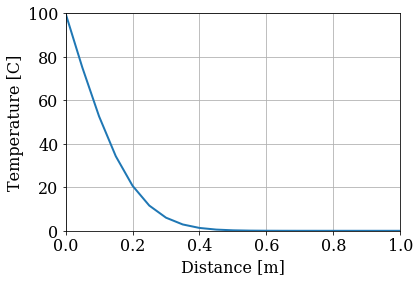

In [13]:
# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

<div class="alert alert-block alert-danger">
Works nicely. But wait! This method has elements of explicit and implicit discretizations. Is it <b>conditionally stable</b> like forward Euler, or <b>unconditionally stable</b> like backward Euler? Try out different values of `sigma`. You'll see Crank-Nicolson is an <b>unconditionally stable scheme</b> for the diffusion equation!
</div>

## Precision & Convergencia

Desafortunadamente, la solucion analitica del problema de la barra es un tanto engorrosa, pero al menos brinda una buena aproximacion si la evaluamos para valores grandes de $n$. Esta luce como sigue:

$$
\begin{eqnarray}
T(x,t) = & \nonumber \\
100 - \sum_{n=1}^{\infty} & \frac{400}{(2n-1)\pi}\sin\left(\frac{(2n-1)\pi}{2L}x\right) \exp\left[-\alpha\left(\frac{(2n-1)\pi}{2L}\right)^2t\right]
\end{eqnarray}
$$

Definamos una funcion que la calcule:

In [15]:
def analytical_temperature(x, t, alpha, L, N):
    """
    Computes and returns a truncated approximation
    of the exact temperature distribution along the rod.
    
    Parameters
    ----------
    x : numpy.ndarray
        Locations at which to calculate the temperature
        as a 1D array of floats.
    t : float
        Time.
    alpha : float
        Thermal diffusivity of the rod.
    L : float
        Length of the rod.
    N : integer
        Number of terms to use in the expansion.
    
    Returns
    -------
    T : numpy.ndarray
        The truncated analytical temperature distribution
        as a 1D array of floats.
    """
    T = 100.0 * numpy.ones_like(x)
    for n in range(1, N + 1):
        k = (2 * n - 1) * numpy.pi / (2.0 * L)
        T -= (400.0 / (2.0 * L * k) *
              numpy.sin(k * x) * numpy.exp(- alpha * k**2 * t))
    return T

Veamos como luce esta expresion para el instante en el cual hemos evaluado la solucion numerica:

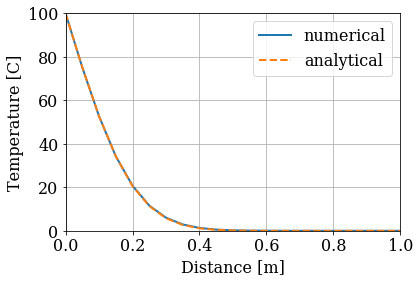

In [16]:
# Compute the analytical temperature distribution.
T_exact = analytical_temperature(x, nt * dt, alpha, L, 100)

# Plot the numerical and analytical temperatures.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, label='numerical',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, T_exact, label='analytical',
            color='C1', linestyle='--', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

In [17]:
T1 = analytical_temperature(x, 0.2, alpha, L, 100)
T2 = analytical_temperature(x, 0.2, alpha, L, 200)
numpy.sqrt(numpy.sum((T1 - T2)**2) / numpy.sum(T2**2))

6.927917118260093e-13

<div class="alert alert-block alert-danger">
That looks like it should. We'll now use this result to study the convergence of the Crank-Nicolson scheme.
</div>

### Convergencia Temporal

Hemos dicho que este metodo tiene una precision de segundo orden en tiempo ... esto es en Teoria, sin embargo deberiamos **verificar** que la solucion numerica en efecto se comporta tal como dice la Teoria!

Manteniendo $\Delta x$ constante, efectuaremos corridas del codigo para diferentes valores de $\Delta t$ y compararemos los resultados obtenidos al mismo instante, digamos $t=n_t\cdot\Delta t=10$, con la expresion analitica anterior.

La condicion inicial del problema de la barra presenta un gradiente muy abrupto: subitamente salta de $0^{\circ}{\rm C}$ a $100^{\circ}{\rm C}$ en la frontera. A fin de resolver tal gradiente al punto que el mismo NO afecte la convergencia temporal, necesitariamos una grilla muy fina, y en consecuencia los calculos serian muy lentos. Para evitar tal inconveniente, arrancaremos desde $t=1$ en lugar de comenzar a partir de $t=0$.

En primer lugar, definamos una funcion que calcule la norma $L_2$ del error:

In [23]:
def l2_error(T, T_exact):
    """
    Computes and returns the relative L2-norm
    of the difference between the numerical solution
    and the exact solution.
    
    Parameters
    ----------
    T : numpy.ndarray
        The numerical solution as an array of floats.
    T_exact : numpy.ndarray
        The exact solution as an array of floats.
    
    Returns
    -------
    error : float
        The relative L2-norm of the difference.
    """
    error = numpy.sqrt(numpy.sum((T - T_exact)**2) /
                       numpy.sum(T_exact**2))
    return error

Comparemos el esquema de Crank-Nicolson con el esquema implicito centrado (*backward Euler*). Para ello, tomaremos prestado algunas funciones del [cuaderno 2](./04_02_EcuacionCalor_1D_Implicita.ipynb).

In [24]:
def lhs_operator_btcs(N, sigma):
    """
    Computes and returns the implicit operator
    of the system for the 1D diffusion equation.
    We use backward Euler method, Dirichlet condition
    on the left side of the domain and zero-gradient
    Neumann condition on the right side.
    
    Parameters
    ----------
    N : integer
        Number of interior points.
    sigma : float
        Value of alpha * dt / dx**2.
    
    Returns
    -------
    A : numpy.ndarray
        The implicit operator as a 2D array of floats
        of size N by N.
    """
    # Setup the diagonal of the operator.
    D = numpy.diag((2.0 + 1.0 / sigma) * numpy.ones(N))
    # Setup the Neumann condition for the last element.
    D[-1, -1] = 1.0 + 1.0 / sigma
    # Setup the upper diagonal of the operator.
    U = numpy.diag(-1.0 * numpy.ones(N - 1), k=1)
    # Setup the lower diagonal of the operator.
    L = numpy.diag(-1.0 * numpy.ones(N - 1), k=-1)
    # Assemble the operator.
    A = D + U + L
    return A

In [25]:
def rhs_vector_btcs(T, sigma, qdx):
    """
    Computes and returns the right-hand side of the system
    for the 1D diffusion equation, using a Dirichlet condition
    on the left side and a Neumann condition on the right side.
    
    Parameters
    ----------
    T : numpy.ndarray
        The temperature distribution as a 1D array of floats.
    sigma : float
        Value of alpha * dt / dx**2.
    qdx : float
        Value of the temperature flux at the right side.
    
    Returns
    -------
    b : numpy.ndarray
        The right-hand side of the system as a 1D array of floats.
    """
    b = T[1:-1] / sigma
    # Set Dirichlet condition.
    b[0] += T[0]
    # Set Neumann condition.
    b[-1] += qdx
    return b

In [26]:
def btcs_implicit(T0, nt, dt, dx, alpha, q):
    """
    Computes and returns the temperature along the rod
    after a given number of time steps.
    
    The function uses Euler implicit in time,
    central differencing in space, a Dirichlet condition
    on the left side, and a Neumann condition on the
    right side.
    
    Parameters
    ----------
    T0 : numpy.ndarray
        The initial temperature distribution
        as a 1D array of floats.
    nt : integer
        Number of time steps to compute.
    dt : float
        Time-step size.
    dx : float
        Distance between two consecutive locations.
    alpha : float
        Thermal diffusivity of the rod.
    q : float
        Value of the temperature gradient on the right side.
    
    Returns
    -------
    T : numpy.ndarray
        The temperature distribution as a 1D array of floats.
    """
    sigma = alpha * dt / dx**2
    # Create the implicit operator of the system.
    A = lhs_operator_btcs(len(T0) - 2, sigma)
    # Integrate in time.
    T = T0.copy()
    for n in range(nt):
        # Generate the right-hand side of the system.
        b = rhs_vector_btcs(T, sigma, q * dx)
        # Solve the system with scipy.linalg.solve.
        T[1:-1] = linalg.solve(A, b)
        # Apply the Neumann boundary condition.
        T[-1] = T[-2] + q * dx
    return T

Ahora, efectuemos las corridas!

In [27]:
# Update parameters.
nx = 1001  # number of points on the rod
dx = L / (nx - 1)  # grid spacing

# Define the locations on the rod.
x = numpy.linspace(0.0, L, num=nx)

# Create a list with the time-step sizes to use.
dt_values = [1.0, 0.5, 0.25, 0.125]

# Create empty lists to hold the errors for both schemes.
errors = []
errors_btcs = []

# Compute the initial temperature distribution at t=1.0.
t0 = 1.0
T0 = analytical_temperature(x, t0, alpha, L, 100)

# Compute the final analytical temperature at t=10.0.
t = 10.0
T_exact = analytical_temperature(x, t, alpha, L, 100)

# Compute the numerical solutions and errors.
for dt in dt_values:
    nt = int((t - t0) / dt)  # number of time steps
    # Compute the solution using Crank-Nicolson scheme.
    T = crank_nicolson(T0, nt, dt, dx, alpha, q)
    # Compute and record the L2-norm of the error.
    errors.append(l2_error(T, T_exact))
    # Compute the solution using implicit BTCS scheme.
    T = btcs_implicit(T0, nt, dt, dx, alpha, q)
    # Compute and record the L2-norm of the error.
    errors_btcs.append(l2_error(T, T_exact))

Grafiquemos!

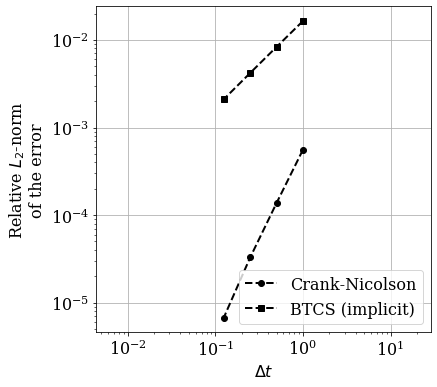

In [28]:
# Plot the error versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.grid()
pyplot.xlabel(r'$\Delta t$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.loglog(dt_values, errors, label='Crank-Nicolson',
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.loglog(dt_values, errors_btcs, label='BTCS (implicit)',
              color='black', linestyle='--', linewidth=2, marker='s')
pyplot.legend()
pyplot.axis('equal');

In [29]:
errors

[0.0005562525604218684,
 0.0001374575644793469,
 3.285170428405964e-05,
 6.771647468538648e-06]

Notamos que el error disminuye cuatro veces a medida que el paso de tiempo se reduce a la mitad ... el metodo de Crank-Nicolson es de segundo orden en tiempo!

Claramente, *Crank-Nicolson* converge mas rapido que *backward Euler*. Ademas, la curva de error se desplaza hacia abajo: Crank-Nicolson es mas preciso!

### Convergencia Espacial

A fin de estudiar la convergencia espacial, efectuaremos corridas del codigo para mallas con 21, 41, 81 y 161 puntos, para luego compararlas al mismo tiempo adimensional, digamos $t=20$. 

Definamos una funcion que realice este calculo:

In [30]:
# Set parameters.
dt = 0.1  # time-step size
t = 20.0  # final time
nt = int(t / dt)  # number of time steps to compute

# Create a list with the grid-spacing sizes to use.
nx_values = [11, 21, 41, 81, 161]

# Create an empty list to store the errors.
errors = []

# Compute the numerical solutions and errors.
for nx in nx_values:
    dx = L / (nx - 1)  # grid spacing
    x = numpy.linspace(0.0, L, num=nx)  # grid points
    # Set the initial conditions for the grid.
    T0 = numpy.zeros(nx)
    T0[0] = 100.0
    # Compute the solution using Crank-Nicolson scheme.
    T = crank_nicolson(T0, nt, dt, dx, alpha, q)
    # Compute the analytical solution.
    T_exact = analytical_temperature(x, t, alpha, L, 100)
    # Compute and record the L2-norm of the error.
    errors.append(l2_error(T, T_exact))

Grafiquemos!

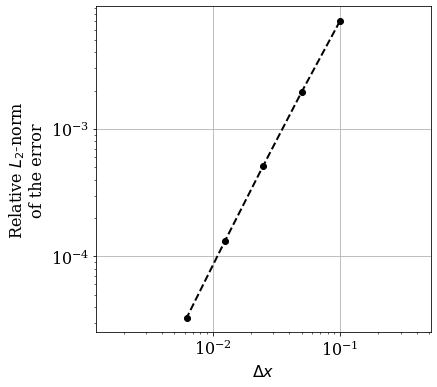

In [32]:
# Plot the error versus the grid-spacing size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.grid()
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
dx_values = L / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors,
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.axis('equal');

Bien! Vemos que por cada cuadrante que nos desplazamos hacia la izquierda, el error disminuye en dos cuadrantes!

##### Dig deeper

<div class="alert alert-block alert-success">
Let's re-do the spatial convergence, but comparing at a much later time, say $t=1000$.
</div>   

In [23]:
# Set parameters.
dt = 0.1  # time-step size
t = 1000.0  # final time
nt = int(t / dt)  # number of time steps to compute

# Create a list with the grid-spacing sizes to use.
nx_values = [11, 21, 41, 81, 161]

# Create an empty list to store the errors.
errors = []

# Compute the numerical solutions and errors.
for nx in nx_values:
    dx = L / (nx - 1)  # grid spacing
    x = numpy.linspace(0.0, L, num=nx)  # grid points
    # Set the initial conditions for the grid.
    T0 = numpy.zeros(nx)
    T0[0] = 100.0
    # Compute the solution using Crank-Nicolson scheme.
    T = crank_nicolson(T0, nt, dt, dx, alpha, q)
    # Compute the analytical solution.
    T_exact = analytical_temperature(x, t, alpha, L, 100)
    # Compute and record the L2-norm of the error.
    errors.append(l2_error(T, T_exact))

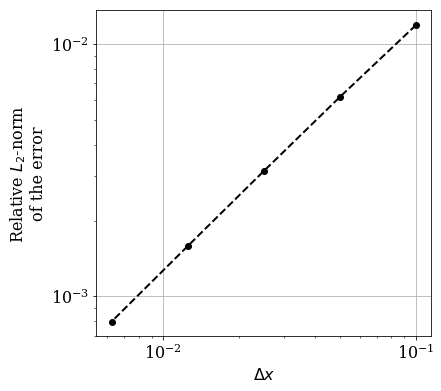

In [24]:
# Plot the error versus the grid-spacing size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.grid()
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
dx_values = L / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors,
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.axis('equal');

In [25]:
errors

[0.011922719076357474,
 0.006181593859790544,
 0.003142664307189285,
 0.0015838621626866334,
 0.0007950070915380142]

<div class="alert alert-block alert-success">
Wait, convergence is not that great now! It's not as good as second order, but not as bad as first order. <i>What is going on?</i>

Remember our implementation of the boundary conditions? We used

$$
\begin{equation}
\frac{T^{n}_{N-1} - T^{n}_{N-2}}{\Delta x} = q
\end{equation}
$$

Well, that is a **first-order** approximation! 

But, why doesn't this affect our solution at an earlier time? Initially, temperature on the right side of the rod is zero and the gradient is very small in that region; at that point in time, errors there were negligible. Once temperature starts picking up, we start having problems.

**Boundary conditions can affect the convergence and accuracy of your solution!**
</div>    

---
###### The cell below loads the style of the notebook

In [33]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())